## やること

* https://www.slideshare.net/KenjiUrai/explanation-of-gpr
    * 式の展開
    * カーネルを使わないと...

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris

In [2]:
# data,target= load_iris().data,load_iris().target
# print(data.shape, target.shape)
# plt.subplot(121)
# plt.scatter(data[:,0], target)
# plt.subplot(122)
# plt.scatter(data[:,1], target)
num = 150
data = np.array([np.linspace(0,2*np.pi,num),np.linspace(0,2*np.pi,num)]).T
#data.shape
target = np.sin(data[:,0])+np.cos(data[:,1])+np.random.rand(len(data))
# plt.scatter(data, target)

In [4]:
sample = random.sample(range(len(data)),k=len(data))

X = data[sample[:75],0:2].T.reshape(2,-1)
X_h = data[sample[75:],0:2].T.reshape(2,-1)
y = target[sample[:75]].reshape(-1,1)

sg = 0.1
D,N = X.shape
S = np.array([[10,1],[0.1,0.01]])

#X-X_h
#data.shape

In [87]:
random.sample(range(len(data)),k=len(data))

[26,
 1,
 3,
 146,
 39,
 119,
 16,
 6,
 7,
 129,
 48,
 60,
 107,
 148,
 86,
 68,
 120,
 66,
 32,
 82,
 54,
 40,
 108,
 14,
 112,
 20,
 2,
 81,
 71,
 89,
 51,
 12,
 61,
 100,
 34,
 125,
 131,
 49,
 58,
 96,
 93,
 59,
 85,
 94,
 136,
 143,
 111,
 133,
 134,
 62,
 91,
 101,
 47,
 102,
 95,
 83,
 117,
 116,
 13,
 29,
 46,
 75,
 5,
 124,
 11,
 130,
 55,
 43,
 127,
 78,
 141,
 142,
 139,
 115,
 17,
 138,
 149,
 41,
 21,
 0,
 23,
 92,
 135,
 31,
 97,
 52,
 126,
 121,
 44,
 144,
 109,
 132,
 38,
 25,
 19,
 84,
 65,
 73,
 10,
 56,
 123,
 128,
 27,
 104,
 90,
 28,
 24,
 35,
 18,
 118,
 113,
 87,
 140,
 137,
 15,
 145,
 9,
 57,
 50,
 22,
 72,
 45,
 105,
 98,
 114,
 33,
 69,
 67,
 79,
 80,
 63,
 106,
 77,
 110,
 30,
 64,
 42,
 147,
 37,
 70,
 88,
 122,
 4,
 74,
 76,
 8,
 103,
 99,
 36,
 53]

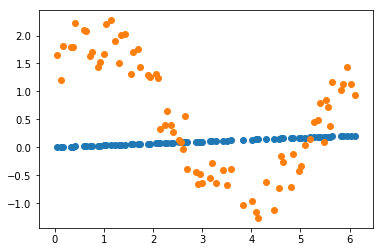

In [5]:
def inv(X):
    return np.linalg.inv(X)

def kernel(x, y, a=0.1, b=0.1):
    return a*np.exp((-b/2)*(x-y)**2)


y_h = X_h.T.dot(S.dot(X)).dot(inv(X.T.dot(S.dot(X))+sg*np.eye(N,N))).dot(y)
y_h.shape
plt.scatter(data[sample[75:],0],y_h)
#plt.scatter(target[sample[75:]],y_h)
plt.scatter(data[sample[75:],0],target[sample[75:]])